This tutorial will demonstrate how to obtain difference images for a planet candidate in TESS data.

In [1]:
import matplotlib.pyplot as plt
import sys
import pickle

sys.path.append('../code')


Provide some basic information on the star and its planet. In this example, we'll look at TIC-25375553, the host star of confirmed planet TOI-143.01 (WASP-111b). There's only one planet in this example, but for multi-planet systems you should list all planets in the same format.

In [2]:
star = {}
star['id'] = 25375553
star['raDegrees'] = 328.76768
star['decDegrees'] = -22.61258

planet0 = {}
planet0['planetID'] = "TOI_" + str(143.01)
planet0['period'] = 2.31097
planet0['epoch'] = 1325.58249
planet0['durationHours'] = 3.129

Since TESS works in distinct "sectors" of data (~27 days), decide which sector you would like to use for difference images. TIC-25375553 was observed in both Sectors 1 and 28, but if you aren't sure, you can check with tess-point. For example:

In [3]:
from tess_stars2px import tess_stars2px_function_entry

outID, outEclipLong, outEclipLat, outSec, outCam, outCcd,\
    outColPix, outRowPix, scinfo = tess_stars2px_function_entry(star['id'], star['raDegrees'], star['decDegrees'])

print(outSec, outCam)

[ 1 28 68] [1 1 1]


Let's pick the most recently observed sector, Sector 28. This will take about a minute to run, as it downloads the FFI cutout using TESScut, identifies the in-transit datapoints, and calculates the difference image. 

In [4]:
import tessDiffImage

star['sector'] = 1
star['cam'] = 1
star['planetData'] = [planet0]
# If you have quality flags for each cadence in the sector in a file, name the file here; otherwise None
star['qualityFiles'] = None
# If you have quality flags for each cadence in the sector in an array, put the array here; otherwise None
star['qualityFlags'] = None

tdi = tessDiffImage.tessDiffImage(star, spiceFileLocation = "..")

tdi.make_ffi_difference_image(thisPlanet=0)

Found existing sector 1 file at ./tic25375553/imageData_TOI_143.01_sector1.pickle


In [5]:
star

{'id': 25375553,
 'raDegrees': 328.76768,
 'decDegrees': -22.61258,
 'sector': 1,
 'cam': 1,
 'planetData': [{'planetID': 'TOI_143.01',
   'period': 2.31097,
   'epoch': 1325.58249,
   'durationHours': 3.129}],
 'qualityFiles': None,
 'qualityFlags': None}

The image data was saved in the newly created tic25375553 folder. You'll also find difference image plots saved as pdfs using default the default plotting, and a list of all nearby TICs. You can always load the data back in if you want to manipulate the data on your own:

For various reasons not all sectors will get difference images, so see what sectors actually have difference images.

In [6]:
tdi.sectorList

[1]

In [7]:
if star['sector'] is not None:
    sector = star['sector']
else: # have to set desired sector by hand
    sector = 1
sectorIndex = tdi.sectorList.index(sector) # make sure outSec[sectorIndex] is in tdi.sectorList

fname = 'tic25375553/imageData_TOI_143.01_sector' + str(sector) + '.pickle'
with open(fname, 'rb') as f:
    imageData = pickle.load(f)

Text(0.5, 1.0, 'Direct Image (Close-up)')

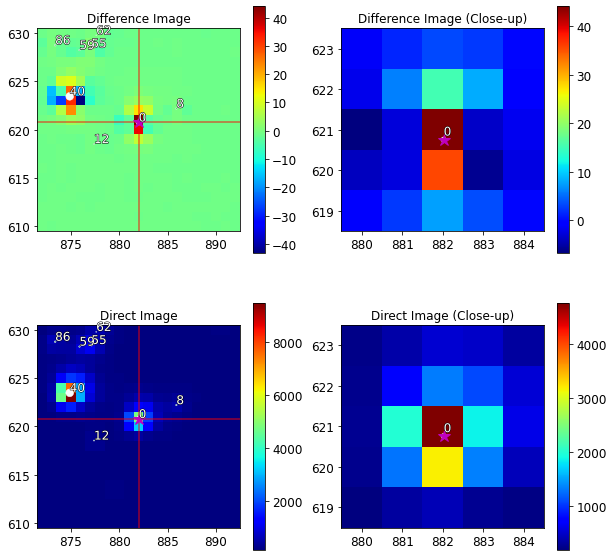

In [8]:
diffImageData = imageData[0]
catalogData = imageData[1]

fig, ax = plt.subplots(2,2,figsize=(10,10))
tdi.draw_pix_catalog(diffImageData['diffImage'], catalogData, catalogData["extent"], ax=ax[0,0], fs=14, ss=60, filterStars=True, dMagThreshold=4, annotate=True)
tdi.draw_pix_catalog(diffImageData['diffImage'], catalogData, catalogData["extentClose"], ax=ax[0,1], fs=14, ss=60, filterStars=True, dMagThreshold=4, annotate=True, close=True)
tdi.draw_pix_catalog(diffImageData['meanOutTransit'], catalogData, catalogData["extent"], ax=ax[1,0], fs=14, ss=60, filterStars=True, dMagThreshold=4, annotate=True)
tdi.draw_pix_catalog(diffImageData['meanOutTransit'], catalogData, catalogData["extentClose"], ax=ax[1,1], fs=14, ss=60, filterStars=True, dMagThreshold=4, annotate=True, close=True)
ax[0,0].set_title('Difference Image')
ax[0,1].set_title('Difference Image (Close-up)')
ax[1,0].set_title('Direct Image')
ax[1,1].set_title('Direct Image (Close-up)')